### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

I'm also going to be experimenting with HoloViews and Bokeh to make the data visualizations more interactive. I previously tried to use mpld3, but mpld3 does not integrate with seaborn, since seaborn is not inherent in matplotlib.

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
#import mpld3
#mpld3.enable_notebook()

In [4]:
#!sudo pip install holoviews

In [5]:
import holoviews as hv
from holoviews import dim, opts
import hvplot.pandas

hv.extension('bokeh', 'matplotlib')

ModuleNotFoundError: No module named 'param'

In [6]:
import re
s = 'c141y_d228a_n235k_n239m' # example of mutation name, showing amino acid changes in 4 loci

In [7]:
re.findall('[0-9]+',s) # example string matching

['141', '228', '235', '239']

### Load the cleaned dataset

In [8]:
# load in dataset
#mutants = pd.read_csv('../data/interim/k8_clean_data.csv', header=None, low_memory=False)
mutants = pd.read_csv('../data/K9_clean_data.csv', low_memory=False)

In [9]:
mutants.shape

(2637, 5410)

In [10]:
mutants.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C5401,C5402,C5403,C5404,C5405,C5406,C5407,C5408,C5409,C5410
0,a119e,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,...,0.006,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007,inactive
1,a119e_l125p,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,...,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive
2,a161t,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,...,0.019,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive
3,c135y,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,...,0.051,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive
4,c135y_e285m,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,...,-0.011,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,inactive


In [11]:
# pull out the column of mutants with the nametags

nametags = mutants['C1']
print(nametags)

0             a119e
1       a119e_l125p
2             a161t
3             c135y
4       c135y_e285m
           ...     
2632    g245s_r280m
2633    g245s_r280n
2634    g245s_r280p
2635    g245s_r280q
2636    g245s_r280s
Name: C1, Length: 2637, dtype: object


### Subset the data

subset the data! first implement analysis on subset, then apply same on full dataset

first, check the mutant tags to see where the mutations are in the amino acid chain, and then subset based on domains

will have 5 subsets, corresponding to each of the 5 major p53 domains!

In [12]:
# create empty lists for each domain
# each list will store the indexes of the mutants (rows) for their respective protein domains

ad_loci = []
dbd_loci = []
td_loci = []
nls_loci = []
bd_loci = []

In [ ]:
# create empty lists for each domain
# each list will store the indexes of the mutants (rows) for their respective protein domains

ad_loci = []
dbd_loci = []
td_loci = []
nls_loci = []
bd_loci = []

In [13]:
def binner(num):
    if num <= 101:
        b = 0
    elif (num > 101) and (num < 305):
        b = 1
    elif (num >= 305) and (num < 326):
        b = 2
    elif (num >= 326) and (num < 364):
        b = 3
    else:
        b = 4
    return b

In [14]:
# since there could be multiple loci, sort based on avg (center) of mutation loci

for tag in nametags:
        search = re.findall('[0-9]+', str(tag))
        snps = np.array(list(map(int, search)))
        bins = list(map(binner,snps))
        b = statistics.mode(bins)
        
#         avg = np.mean(snps)

        
        if b == 0:
            #t = nametags.index(nametags.loc[tag])
            ad_loci.append(mutants[mutants['C1'] == tag])
            continue
        elif b == 1:
            #t = nametags.index(tag)
            dbd_loci.append(mutants[mutants['C1'] == tag])
            continue
        elif b == 2:
            #t = nametags.index(tag)
            td_loci.append(mutants[mutants['C1'] == tag])
            continue
        elif b == 3:
            #t = nametags.index(tag)
            nls_loci.append(mutants[mutants['C1'] == tag])
            continue
        elif b == 4:
            #t = nametags.index(tag)
            bd_loci.append(mutants[mutants['C1'] == tag])
            continue
        
            

# make sure to check the size of each subset

In [15]:
len(ad_loci)

0

In [16]:
len(dbd_loci)

2637

In [17]:
len(td_loci)

0

In [18]:
len(nls_loci)

0

In [19]:
len(bd_loci)

0

In [20]:
#ad_loci = pd.concat(nls_loci)

In [21]:
# maybe add in the different methods used to partition the data in this way for comparison of the results

I tried splitting the dataset up by the domain that contained the mutation loci, but that did not work. 

Splitting the mutants by protein domain provided wildly imbalanced subsets, since it seems that the overwhelming majority of the mutants have at least one mutation in the DBD domain of p53. 
We can look at the domain-wise distribution of the p53 mutations to confirm this. 

A more even way to partition the dataset would probably be to partition by the number of mutations per mutant - one, two, three, or four and more mutations.

In [22]:
singles = [] # one mutation
doubles = [] # two mutations
triples = [] # three mutations
multis = [] # four or more mutations

In [23]:
# subset data based on the number of mutations per mutant protein

for tag in nametags:
        search = re.findall('[0-9]+', str(tag))
        snps = np.array(list(map(int, search)))
        num_loci = len(snps)
        
        if num_loci == 1:
            #t = nametags.index(nametags.loc[tag])
            singles.append(mutants[mutants['C1'] == tag])
        elif num_loci == 2:
            #t = nametags.index(tag)
            doubles.append(mutants[mutants['C1'] == tag])
        elif num_loci == 3:
            #t = nametags.index(tag)
            triples.append(mutants[mutants['C1'] == tag])
        elif num_loci >= 4:
            #t = nametags.index(tag)
            multis.append(mutants[mutants['C1'] == tag])
        
# make sure to check the size of each subset

In [24]:
singles = pd.concat(singles)
doubles = pd.concat(doubles)
triples = pd.concat(triples)
multis = pd.concat(multis)

In [25]:
singles.shape

(19, 5410)

In [26]:
doubles.shape

(2588, 5410)

In [27]:
triples.shape

(24, 5410)

In [28]:
multis.shape # four or more mutations

(6, 5410)

Splitting the dataset this way also gave us imbalanced subsets, but not *quite* as imbalanced as they were when separated by protein domain. We can see that the majority of mutants in the dataset have only two mutations, and single mutations or three or more mutations are less common.

Is there perhaps a relationship between the number of mutations and the mutation loci? 

*One idea is to randomly subset the rows of the dataset for the preprocessing. Otherwise, if possible, we could make synthetic data to supplement the subsets.*

## Data Visualization with PCA

Let's try visualizing with PCA to find some trends in the data. We'll then plot the data with t-SNE and compare the results.

[Reference](https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d#:~:text=t%2DSNE%20is%20also%20a,large%20pairwise%20distance%20maximize%20variance.&text=It%20takes%20a%20set%20of,it%20into%20low%20dimensional%20data)

In [29]:
mutants.shape # cleaned starting dataset

(2637, 5410)

In [30]:
labels = mutants['C5410'] # target variable labels
tags = mutants['C1'] # mutant tag names

In [31]:
# dropping labels and tags from mutants data and storing in a new variable, m
m = mutants.drop(['C1', 'C5410'], axis=1)

In [32]:
m.shape

(2637, 5408)

In [33]:
labels.shape

(2637,)

In [34]:
tags.shape

(2637,)

In [35]:
m.head() # only numerical data

,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,...,C5400,C5401,C5402,C5403,C5404,C5405,C5406,C5407,C5408,C5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,-0.015,0.006,0.013,0.021,0.020,0.016,-0.011,0.003,0.010,-0.007
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.007,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,-0.016,0.019,0.010,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,-0.028,0.051,0.012,0.050,0.038,0.051,-0.015,0.017,0.027,-0.049
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.027,-0.011,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013


In [36]:
# Standardizing data
standardized_m = StandardScaler().fit_transform(m)
standardized_m.shape

(2637, 5408)

In [37]:
# co-variance of matrix
sample_data = standardized_m
cov_matrix = np.matmul(sample_data.T, sample_data)
cov_matrix.shape

(5408, 5408)

In [38]:
from scipy.linalg import eigh

In [39]:
# calculating top two eigenvectors for projecting onto a 2D space
values, vectors = eigh(cov_matrix, eigvals=(5406, 5407))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

/tmp/ipykernel_1/4107639798.py:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(cov_matrix, eigvals=(5406, 5407))


(5408, 2)
(2, 5408)


In [40]:
# projecting original data sample on plane formed by two principal eigenvectors by vector-vector multiplication
new_coord = np.matmul(vectors, sample_data.T)
new_coord.shape

(2, 2637)

In [41]:
# appending labels and tags to the 2D projection of the data
new_coord = np.vstack((new_coord, labels, tags)).T

In [42]:
# new dataframe for plotting labeled 2D projection
df = pd.DataFrame(data=new_coord, columns=("1st_Principal", "2nd_Principal", "Labels", "Tags"))
df.head()

,1st_Principal,2nd_Principal,Labels,Tags
0,-29.953556,-21.619657,inactive,a119e
1,-42.035685,-4.378969,inactive,a119e_l125p
2,4.918944,-7.27331,inactive,a161t
3,4.179454,-34.036638,inactive,c135y
4,13.72531,24.368584,inactive,c135y_e285m


In [43]:
df.shape

(2637, 4)

In [44]:
!pip install mpld3

  Using cached mpld3-0.5.10-py3-none-any.whl.metadata (5.1 kB)
Using cached mpld3-0.5.10-py3-none-any.whl (202 kB)


In [45]:
%matplotlib inline
import matplotlib.pylab as plt
import mpld3

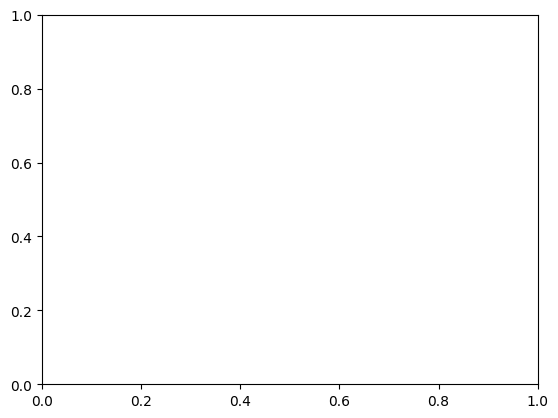

In [46]:
# plotting 2D datapoints with seaborn
# would this work better if the Labels were encoded as 1s and 0s?

fig, ax = plt.subplots()

scatter = sns.FacetGrid(df, palette='pastel', hue="Labels", height=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
#fig = plt.gcf()

# attempt 1 to hover-label points on plot with mpld3
tooltip = mpld3.plugins.PointLabelTooltip(fig, labels=list(df.Labels))
mpld3.plugins.connect(fig, tooltip)

mpld3.display()
#plt.show()

In [47]:
labels.value_counts() # blue points are inactive, orange points are active

C5410
inactive    2611
active        26
Name: count, dtype: int64

The orange dots, or "active" mutants, seem to have around 4 to 6 clusters. This is very interesting and should be explored further! I wonder if this pattern could be further elucidated through t-SNE plots?

In [48]:
# initialize PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [65]:
# configuring the number of components
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of the reduced PCA = ", pca_data.shape)

shape of the reduced PCA =  (2637, 2)


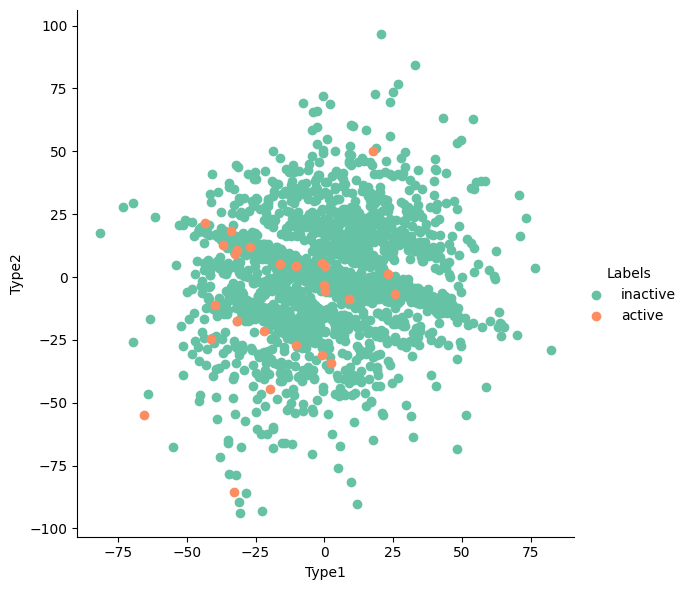

In [66]:
# appending labels to PCA data
pca_data = np.vstack((pca_data.T, labels)).T

# new dataframe to plot the PCA results
pca_df = pd.DataFrame(pca_data, columns=("Type1", "Type2", "Labels"))
sns.FacetGrid(pca_df, palette='Set2', hue="Labels", height=6).map(plt.scatter, 'Type1', 'Type2').add_legend()
plt.show()

The PCA plot with 2 principal components shows 5 or 6 groups of "active" (orange) mutants. These groups or clusters are arranged somewhat in lines. These groups of "active" mutants and why they are clustered like that could be interesting to look into further!



*   large feature overlap
*   not easily separable
*   could try rotating the data before plotting (see [Holoviews PCA](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/pca-exploration/#orgac0cc33))



## Visualizing Results of t-SNE

Now, I will use a non-linear method of visualization for highly dimensional data to get more insights into the data, as well as to compare results with the observations from PCA.

References:


*   [Reading t-SNE plots](https://distill.pub/2016/misread-tsne/)
*   [PCA vs t-SNE](https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d#:~:text=t%2DSNE%20is%20also%20a,large%20pairwise%20distance%20maximize%20variance.&text=It%20takes%20a%20set%20of,it%20into%20low%20dimensional%20data)


In [51]:
from sklearn.manifold import TSNE

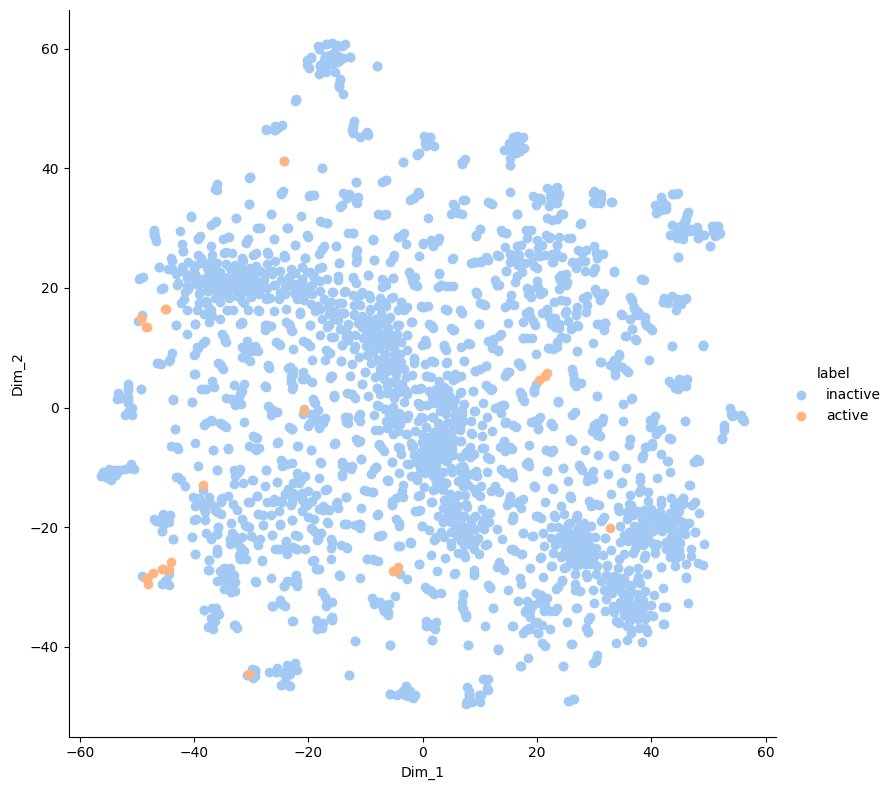

In [52]:
# if TSNE takes too long for all of the points, just pick the top 1000 points, but try with the full dataset first
model = TSNE(n_components=2, random_state=420)
samples = standardized_m
# default perplexity = 30
# default epsilon (learning rate) = 200
# default Maximum number of iteration for the optimization = 1000

tsne_data = model.fit_transform(samples)

# new df to help plot resulting data
tsne_data = np.vstack((tsne_data.T, labels)).T # not really important to append the tags, just the labels for now
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# plot resulting t-SNE model

sns.FacetGrid(tsne_df, palette='pastel', hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

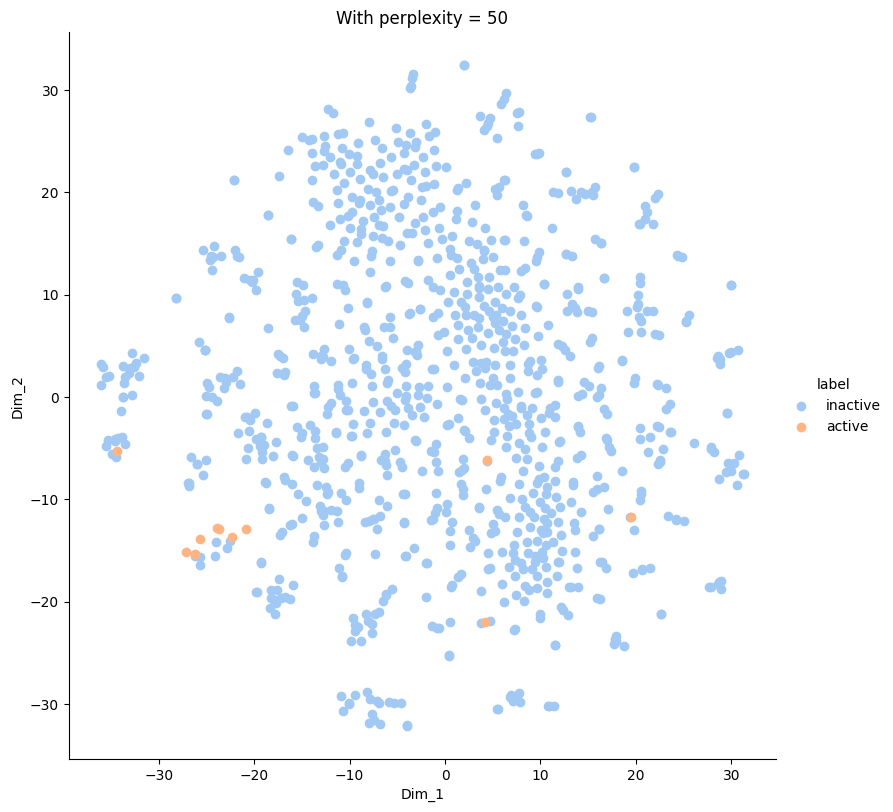

In [53]:
model = TSNE(n_components=2, random_state=420, perplexity=50) # try with top 1000 data points first

samples_1000 = standardized_m[0:1000,:]
labels_1000 = labels[0:1000]

tsne_data = model.fit_transform(samples_1000)

# new df to help plot resulting data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T # not really important to append the tags, just the labels for now
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# plot resulting t-SNE model

sns.FacetGrid(tsne_df, palette='pastel', hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

**Increasing the perplexity** results in [insert comparison of this plot with previous one]

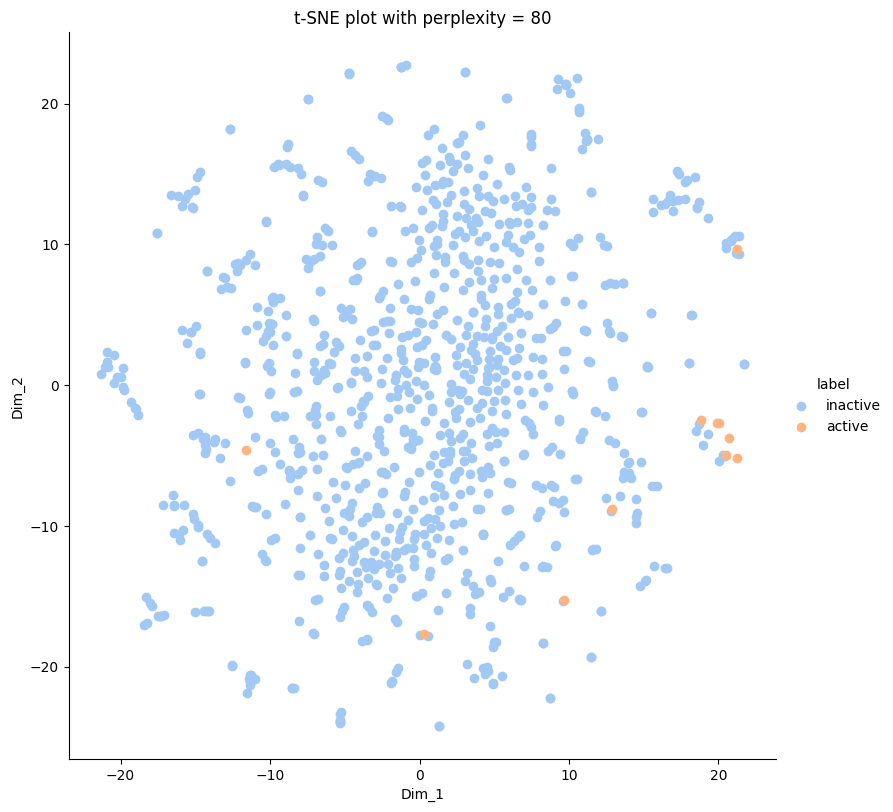

In [54]:
model = TSNE(n_components=2, random_state=420, perplexity=80) # try with top 1000 data points first

samples_1000 = standardized_m[0:1000,:]
labels_1000 = labels[0:1000]

tsne_data = model.fit_transform(samples_1000)

# new df to help plot resulting data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T 
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# plot resulting t-SNE model

sns.FacetGrid(tsne_df, palette='pastel', hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot with perplexity = 80')
plt.show()

There is a grouping of five orange dots in the top right corner, indicating similarity between those "active" mutants. This is interesting! Let's isolate this grouping and further investigate.

I want to repeat t-SNE after performing dimensionality reduction techniques and further analyze the results by comparing to the plots of the original dataset.